In [16]:
from neural_detection_model import NeuralDetectionCNN
import torch


In [17]:
model = NeuralDetectionCNN()
model_weight_path = "/home/bl515-ml/Documents/shaio_jie/ienf_q/U_net_transform/last_train/neural_detection_model_final.pth"
model.load_state_dict(torch.load(model_weight_path))
model.eval().cuda()

NeuralDetectionCNN(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d

In [24]:
import torch.nn.functional as F# Load Image
from PIL import Image
import numpy as np

image_path = "/home/bl515-ml/Documents/shaio_jie/ienf_q/Centered/processed_S163-2_b.tif"
image = Image.open(image_path)
image = np.array(image).astype(np.float32)
input_tensor = torch.from_numpy(image.transpose((2, 0, 1))).unsqueeze(0).cuda()
with torch.no_grad():
	transformed_image = model(input_tensor)
	# Apply softmax to get probabilities
	transformed_image = F.softmax(transformed_image, dim=1)
	
transformed_image = transformed_image.squeeze().cpu().numpy().transpose((1, 2, 0))

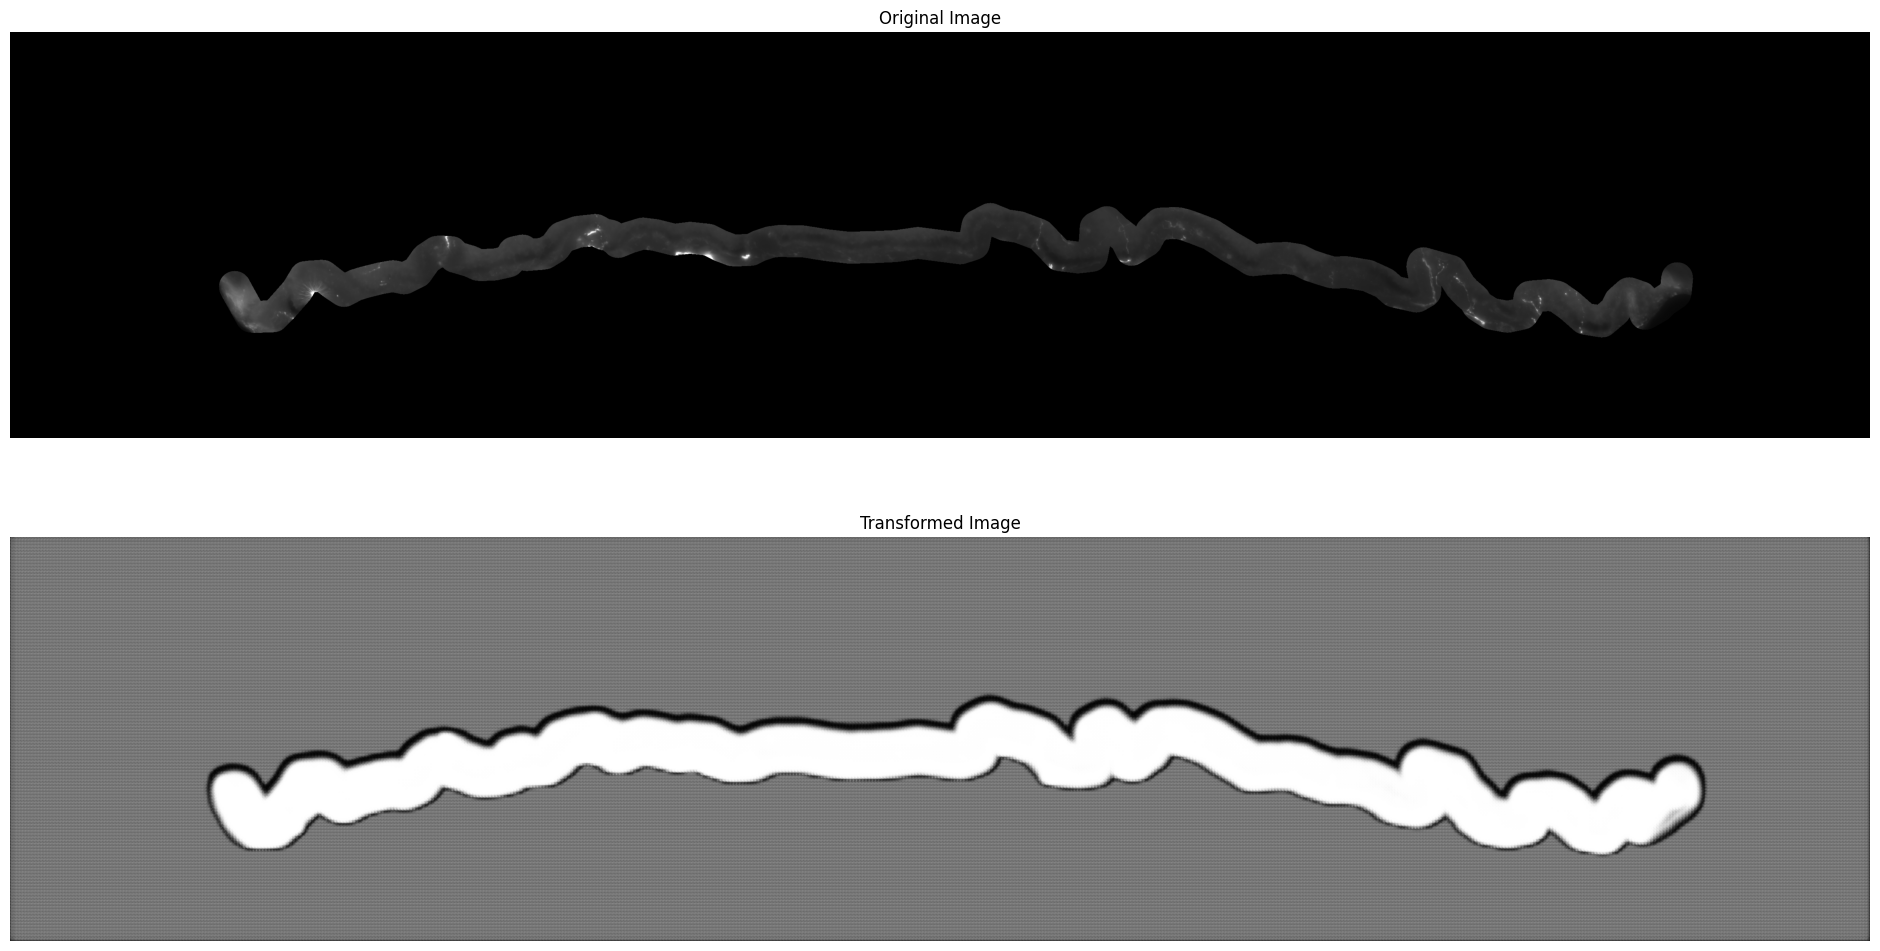

In [25]:

# compare original and transformed image
import matplotlib.pyplot as plt
plt.figure(figsize=(24, 12))
plt.subplot(2, 1, 1)
plt.title("Original Image")
# plt.imshow(image[270:570,1470:1670, 1], cmap='gray')
plt.imshow(image[:,:, 1], cmap='gray')
plt.axis('off')	
plt.subplot(2, 1, 2)
plt.title("Transformed Image")
# plt.imshow(transformed_image[270:570,1470:1670, 1], cmap='gray')
plt.imshow(transformed_image[:,:, 1], cmap='gray')
plt.axis('off')
plt.show()

In [20]:
print(transformed_image.min(), transformed_image.max())

0.0 1.0


In [21]:
# Save transformed image
transformed_image_pil = Image.fromarray((transformed_image * 255).astype(np.uint8))
transformed_image_pil.save("/home/bl515-ml/Documents/shaio_jie/ienf_q/U_net_transform/test_transformed_image.png")
#!/usr/bin/env python3